### 23.11.18
# DSC530 Data Exploration and Analysis, Term Project, Ross Kim (Schreck)

# comments

In [99]:
## GIT link: https://github.com/rlawnsdnjs706/DSC530_term.git

# A minimum of 5 variables in your dataset used during your analysis (for help with selecting, 
# the author made his selection on page 6 of your book). 
# Consider what you think could have an impact on your question – 
# remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

# Describe what the 5 variables mean in the dataset (Chapter 1).

## Variables:
## Birth - total number of births in the year
## Birth rate - the ratio between the number of liveborn births in the year and the average total population of that year
## Death - total number of deaths in the year
## Death rate - the ratio between the number of death in the year and the average total population of that year
## Divorce - total number of divorces in the year
## Divorce rate - the ratio between the number of divorces in the year and the average total population of that year
## Marriage - total number of marriages in the year
## Marriage rate - the ratio between the number of marriages in the year and the average total population of that year
## Natural growth - total difference between births and deaths in the year
## Natural growth rate - the ratio between the number of births and deaths of the average total population of that year

In [100]:
# imports

import pandas as pd
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import datetime
import statistics
import first
from scipy.stats import poisson
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [101]:
# import dataset as dt

dt = pd.read_csv('ROK_demographics_2000-2022.csv')

In [102]:
# return head

dt.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [103]:
# convert integer date column to dates in international format

dt['Date'] = pd.to_datetime(dt['Date'], format='%m/%d/%Y')
dt.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,2000-01-01,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,2000-01-01,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,2000-01-01,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,2000-01-01,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,2000-01-01,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [104]:
# add index column

dt.insert(0, 'ID', range(0, 0 + len(dt)))

In [105]:
# filter Seoul

dt.set_index("Region", inplace = True)

dt_seoul = dt.loc["Seoul"]
dt_seoul

,ID,Date,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
Region,,,,,,,,,,,,
Seoul,15,2000-01-01,12866.0,14.79,3931.0,4.5,1835.0,2.1,6781.0,7.8,8935.0,10.3
Seoul,33,2000-02-01,11797.0,14.48,3218.0,4.0,1912.0,2.3,5596.0,6.9,8579.0,10.5
Seoul,51,2000-03-01,12453.0,14.29,3368.0,3.9,2333.0,2.7,6781.0,7.8,9085.0,10.4
Seoul,69,2000-04-01,10782.0,12.77,3204.0,3.8,1916.0,2.3,6667.0,7.9,7578.0,9.0
Seoul,87,2000-05-01,10817.0,12.39,3064.0,3.5,2108.0,2.4,8428.0,9.7,7753.0,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...
Seoul,4785,2022-02-01,3452.0,4.80,4511.0,6.3,1007.0,1.4,2979.0,4.1,-1059.0,-1.5
Seoul,4803,2022-03-01,4002.0,5.00,6529.0,8.2,1084.0,1.4,2774.0,3.5,-2527.0,-3.2
Seoul,4821,2022-04-01,3603.0,4.70,5351.0,6.9,1056.0,1.4,2844.0,3.7,-1747.0,-2.3


In [106]:
# return Seoul

dt_seoul.head()

          ID       Date    Birth  Birth_rate   Death  Death_rate  Divorce  \
Region                                                                      
Seoul     15 2000-01-01  12866.0       14.79  3931.0         4.5   1835.0   
Seoul     33 2000-02-01  11797.0       14.48  3218.0         4.0   1912.0   
Seoul     51 2000-03-01  12453.0       14.29  3368.0         3.9   2333.0   
Seoul     69 2000-04-01  10782.0       12.77  3204.0         3.8   1916.0   
Seoul     87 2000-05-01  10817.0       12.39  3064.0         3.5   2108.0   
...      ...        ...      ...         ...     ...         ...      ...   
Seoul   4785 2022-02-01   3452.0        4.80  4511.0         6.3   1007.0   
Seoul   4803 2022-03-01   4002.0        5.00  6529.0         8.2   1084.0   
Seoul   4821 2022-04-01   3603.0        4.70  5351.0         6.9   1056.0   
Seoul   4839 2022-05-01   3372.0        4.20  4172.0         5.2   1263.0   
Seoul   4857 2022-06-01   3137.0        4.10  3631.0         4.7   1088.0   

In [107]:
dt_seoul.head()

,ID,Date,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
Region,,,,,,,,,,,,
Seoul,15,2000-01-01,12866.0,14.79,3931.0,4.5,1835.0,2.1,6781.0,7.8,8935.0,10.3
Seoul,33,2000-02-01,11797.0,14.48,3218.0,4.0,1912.0,2.3,5596.0,6.9,8579.0,10.5
Seoul,51,2000-03-01,12453.0,14.29,3368.0,3.9,2333.0,2.7,6781.0,7.8,9085.0,10.4
Seoul,69,2000-04-01,10782.0,12.77,3204.0,3.8,1916.0,2.3,6667.0,7.9,7578.0,9.0
Seoul,87,2000-05-01,10817.0,12.39,3064.0,3.5,2108.0,2.4,8428.0,9.7,7753.0,8.9


# Include a histogram of each of the 5 variables – in your summary and analysis, 
# identify any outliers and explain the reasoning for them being outliers 
# and how you believe they should be handled (Chapter 2).

In [108]:
# comments

## Number of births per year.
## Relevant figures should be from 2000-2020;
## Any data before 2000 should be removed.
## Mean: 	7,103.47
## Mode: 	8,089.00
## Spread: 	3,647,394.29
## Tail: 	Region
## Seoul    3,452.0
## Seoul    4,002.0
## Seoul    3,603.0
## Seoul    3,372.0
## Seoul    3,137.0

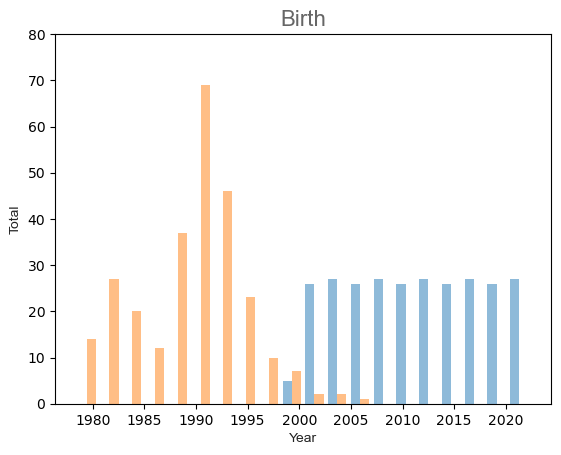

In [109]:
# hist 01 - Birth

x01 = dt_seoul.Date
y01 = dt_seoul.Birth

plt.hist([x01, y01], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Birth', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Total', fontdict = font2)
plt.ylim(0, 80)
plt.xlim()
plt.show()

In [110]:
# Include the other descriptive characteristics about the variables: 
# Mean (Chapter 2).

In [111]:
# hist 01 - Birth mean

statistics.mean(dt_seoul.Birth)

7103.470370370371

In [112]:
# Include the other descriptive characteristics about the variables: 
# Mode (Chapter 2).

In [113]:
# hist 01 - Birth mode

statistics.mode(dt_seoul.Birth)

8089.0

In [114]:
# Include the other descriptive characteristics about the variables: 
# Spread (Chapter 2).

In [115]:
# hist 01 - Birth spread

dt_seoul.Birth.var()

3647394.2872229116

In [116]:
# Include the other descriptive characteristics about the variables: 
# Tails (Chapter 2).

In [117]:
# hist 01 - Birth tail

dt_seoul.Birth.tail()

Region
Seoul    3452.0
Seoul    4002.0
Seoul    3603.0
Seoul    3372.0
Seoul    3137.0
Name: Birth, dtype: float64

# Include a histogram of each of the 5 variables – in your summary and analysis, 
# identify any outliers and explain the reasoning for them being outliers 
# and how you believe they should be handled (Chapter 2).

In [118]:
# comments

## Birth rate per year.
## Relevant figures should be from 2000-2020;
## Obvious outlier is the datapoint for 1970.
## Mean: 	8.48
## Mode: 	5.00
## Spread: 	4.46
## Tail: 	Region
## Seoul    4.8
## Seoul    5.0
## Seoul    4.7
## Seoul    4.2
## Seoul    4.1

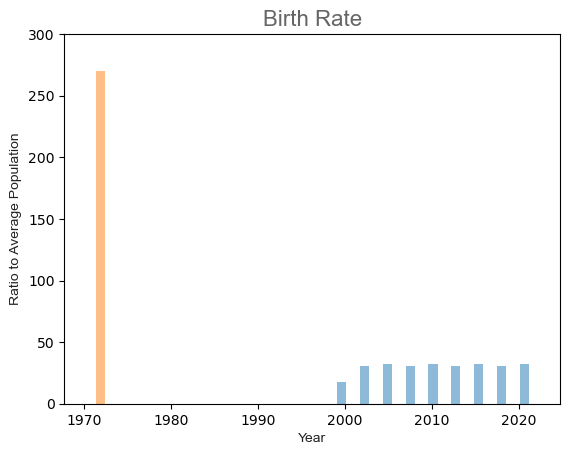

In [119]:
# hist 02 - Birth Rate

x02 = dt_seoul.Date
y02 = dt_seoul.Birth_rate

plt.hist([x02, y02], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Birth Rate', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Ratio to Average Population', fontdict = font2)
plt.ylim(0, 300)
plt.xlim()
plt.show()

In [120]:
# Include the other descriptive characteristics about the variables: 
# Mean (Chapter 2).

In [121]:
# hist 02 - Birth Rate mean

statistics.mean(dt_seoul.Birth_rate)

8.475555555555555

In [122]:
# Include the other descriptive characteristics about the variables: 
# Mode (Chapter 2).

In [123]:
# hist 02 - Birth Rate mode

statistics.mode(dt_seoul.Birth_rate)

5.0

In [124]:
# Include the other descriptive characteristics about the variables: 
# Spread (Chapter 2).

In [125]:
# hist 02 - Birth Rate spread

dt_seoul.Birth_rate.var()

4.459966047087978

In [126]:
# Include the other descriptive characteristics about the variables: 
# Tails (Chapter 2).

In [127]:
# hist 02 - Birth Rate tail

dt_seoul.Birth_rate.tail()

Region
Seoul    4.8
Seoul    5.0
Seoul    4.7
Seoul    4.2
Seoul    4.1
Name: Birth_rate, dtype: float64

# Include a histogram of each of the 5 variables – in your summary and analysis, 
# identify any outliers and explain the reasoning for them being outliers 
# and how you believe they should be handled (Chapter 2).

In [128]:
# comments

## Number of deaths per year.
## Relevant figures should be from 2000-2020;
## Obvious outlier are the datapoint for the 1980s.
## Mean: 	3,460.61
## Mode: 	3,300.00
## Spread: 	160,727.65
## Tail: 	Region
## Seoul    4,511.0
## Seoul    6,529.0
## Seoul    5,351.0
## Seoul    4,172.0
## Seoul    3,631.0

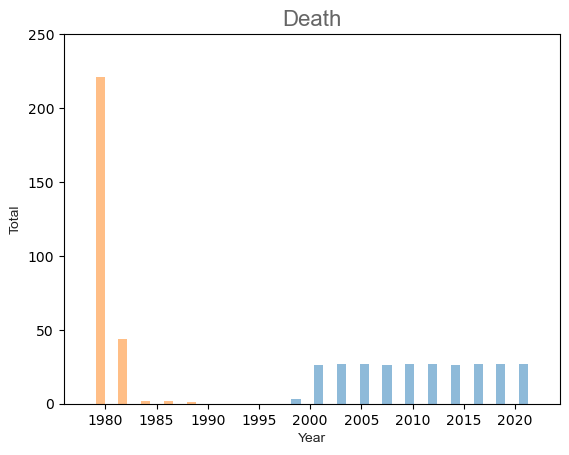

In [129]:
# hist 03 - Death

x03 = dt_seoul.Date
y03 = dt_seoul.Death

plt.hist([x03, y03], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Death', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Total', fontdict = font2)
plt.ylim(0, 250)
plt.xlim()
plt.show()

In [130]:
# Include the other descriptive characteristics about the variables: 
# Mean (Chapter 2).

In [131]:
# hist 03 - Death mean

statistics.mean(dt_seoul.Death)

3460.607407407407

In [132]:
# Include the other descriptive characteristics about the variables: 
# Mode (Chapter 2).

In [133]:
# hist 03 - Death mode

statistics.mode(dt_seoul.Death)

3300.0

In [134]:
# Include the other descriptive characteristics about the variables: 
# Spread (Chapter 2).

In [135]:
# hist 03 - Death spread

dt_seoul.Death.var()

160727.65198953595

In [136]:
# Include the other descriptive characteristics about the variables: 
# Tails (Chapter 2).

In [137]:
# hist 03 - Death tail

dt_seoul.Death.tail()

Region
Seoul    4511.0
Seoul    6529.0
Seoul    5351.0
Seoul    4172.0
Seoul    3631.0
Name: Death, dtype: float64

# Include a histogram of each of the 5 variables – in your summary and analysis, 
# identify any outliers and explain the reasoning for them being outliers 
# and how you believe they should be handled (Chapter 2).

In [138]:
# comments

## Death rate per year.
## Relevant figures should be from 2000-2020;
## Obvious outlier is the datapoint for 1970.
## Mean: 	4.17
## Mode: 	3.90
## Spread: 	0.34
## Tail: 	Region
## Seoul    6.3
## Seoul    8.2
## Seoul    6.9
## Seoul    5.2
## Seoul    4.7

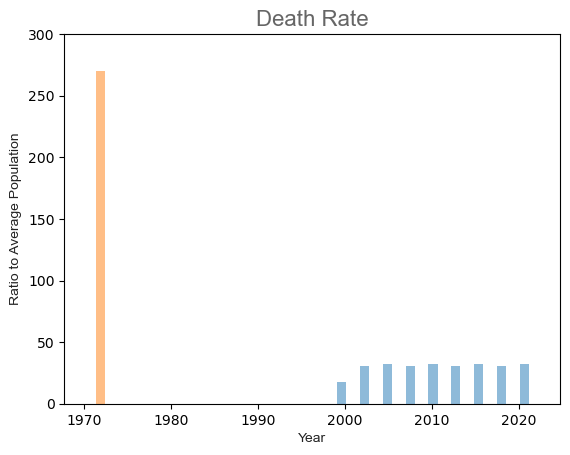

In [139]:
# hist 04 - Death Rate

x04 = dt_seoul.Date
y04 = dt_seoul.Death_rate

plt.hist([x04, y04], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Death Rate', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Ratio to Average Population', fontdict = font2)
plt.ylim(0, 300)
plt.xlim()
plt.show()

In [140]:
# Include the other descriptive characteristics about the variables: 
# Mean (Chapter 2).

In [141]:
# hist 04 - Death Rate mean

statistics.mean(dt_seoul.Death_rate)

4.166296296296296

In [142]:
# Include the other descriptive characteristics about the variables: 
# Mode (Chapter 2).

In [143]:
# hist 04 - Death Rate mode

statistics.mode(dt_seoul.Death_rate)

3.9

In [144]:
# Include the other descriptive characteristics about the variables: 
# Spread (Chapter 2).

In [145]:
# hist 04 - Death Rate spread

dt_seoul.Death_rate.var()

0.33852526504199365

In [146]:
# Include the other descriptive characteristics about the variables: 
# Tails (Chapter 2).

In [147]:
# hist 04 - Death Rate tail

dt_seoul.Death_rate.tail()

Region
Seoul    6.3
Seoul    8.2
Seoul    6.9
Seoul    5.2
Seoul    4.7
Name: Death_rate, dtype: float64

# Include a histogram of each of the 5 variables – in your summary and analysis, 
# identify any outliers and explain the reasoning for them being outliers 
# and how you believe they should be handled (Chapter 2).

In [148]:
# comments

## Number of divorces per year.
## Relevant figures should be from 2000-2020;
## Obvious outlier are the datapoint for the 1970s and 1980s.
## Mean: 	1,821.14
## Mode: 	2,272.00
## Spread: 	183,302.89
## Tail: 	Region
## Seoul    1,007.0
## Seoul    1,084.0
## Seoul    1,056.0
## Seoul    1,263.0
## Seoul    1,088.0

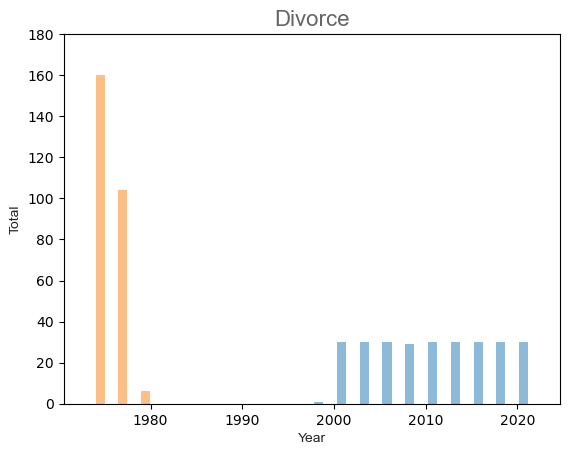

In [149]:
# hist 05 - Divorce

x05 = dt_seoul.Date
y05 = dt_seoul.Divorce

plt.hist([x05, y05], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Divorce', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Total', fontdict = font2)
plt.ylim(0, 180)
plt.xlim()
plt.show()

In [150]:
# Include the other descriptive characteristics about the variables: 
# Mean (Chapter 2).

In [151]:
# hist 05 - Divorce mean

statistics.mean(dt_seoul.Divorce)

1821.1444444444444

In [152]:
# Include the other descriptive characteristics about the variables: 
# Mode (Chapter 2).

In [153]:
# hist 05 - Divorce mode

statistics.mode(dt_seoul.Divorce)

2272.0

In [154]:
# Include the other descriptive characteristics about the variables: 
# Spread (Chapter 2).

In [155]:
# hist 05 - Divorce spread

dt_seoul.Divorce.var()

183302.8898389095

In [156]:
# Include the other descriptive characteristics about the variables: 
# Tails (Chapter 2).

In [157]:
# hist 05 - Divorce tail

dt_seoul.Divorce.tail()

Region
Seoul    1007.0
Seoul    1084.0
Seoul    1056.0
Seoul    1263.0
Seoul    1088.0
Name: Divorce, dtype: float64

# Include a histogram of each of the 5 variables – in your summary and analysis, 
# identify any outliers and explain the reasoning for them being outliers 
# and how you believe they should be handled (Chapter 2).

In [158]:
# comments

## Divorce rate per year.
## Relevant figures should be from 2000-2020;
## Obvious outlier is the datapoint for 1970.
## Mean: 	2.18
## Mode: 	1.90
## Spread: 	0.22
## Tail: 	Region
## Seoul    1.4
## Seoul    1.4
## Seoul    1.4
## Seoul    1.6
## Seoul    1.4

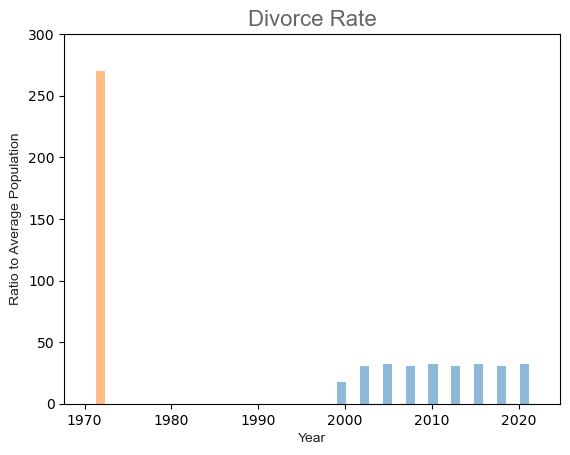

In [159]:
# hist 06 - Divorce Rate

x06 = dt_seoul.Date
y06 = dt_seoul.Divorce_rate

plt.hist([x06, y06], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Divorce Rate', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Ratio to Average Population', fontdict = font2)
plt.ylim(0, 300)
plt.xlim()
plt.show()

In [160]:
# Include the other descriptive characteristics about the variables: 
# Mean (Chapter 2).

In [161]:
# hist 06 - Divorce Rate mean

statistics.mean(dt_seoul.Divorce_rate)

2.178148148148148

In [162]:
# Include the other descriptive characteristics about the variables: 
# Mode (Chapter 2).

In [163]:
# hist 06 - Divorce Rate mode

statistics.mode(dt_seoul.Divorce_rate)

1.9

In [164]:
# Include the other descriptive characteristics about the variables: 
# Spread (Chapter 2).

In [165]:
# hist 06 - Divorce Rate spread

dt_seoul.Divorce_rate.var()

0.21911179953187446

In [166]:
# Include the other descriptive characteristics about the variables: 
# Tails (Chapter 2).

In [167]:
# hist 06 - Divorce Rate tail

dt_seoul.Divorce_rate.tail()

Region
Seoul    1.4
Seoul    1.4
Seoul    1.4
Seoul    1.6
Seoul    1.4
Name: Divorce_rate, dtype: float64

# Include a histogram of each of the 5 variables – in your summary and analysis, 
# identify any outliers and explain the reasoning for them being outliers 
# and how you believe they should be handled (Chapter 2).

In [168]:
# comments

## Number of marriages per year.
## Relevant figures should be from 2000-2020;
## Datapoints before 2000 seem to be erratic.
## Mean: 	5,398.06
## Mode: 	6,781.00
## Spread: 	2,060,503.98
## Tail: 	Region
## Seoul    2,979.0
## Seoul    2,774.0
## Seoul    2,844.0
## Seoul    3,259.0
## Seoul    2,630.0

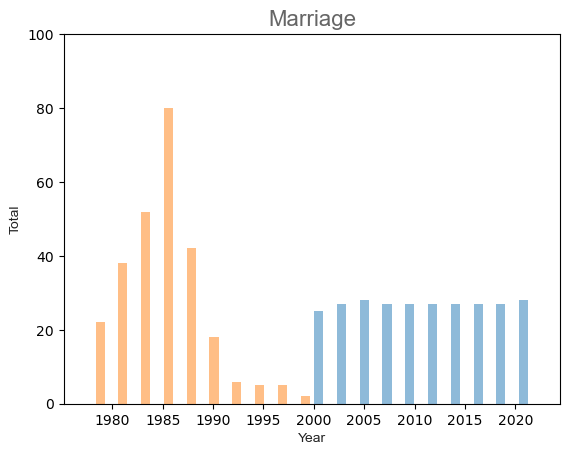

In [169]:
# hist 07 - Marriage

x07 = dt_seoul.Date
y07 = dt_seoul.Marriage

plt.hist([x07, y07], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Marriage', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Total', fontdict = font2)
plt.ylim(0, 100)
plt.xlim()
plt.show()

In [170]:
# Include the other descriptive characteristics about the variables: 
# Mean (Chapter 2).

In [171]:
# hist 07 - Marriage mean

statistics.mean(dt_seoul.Marriage)

5398.055555555556

In [172]:
# Include the other descriptive characteristics about the variables: 
# Mode (Chapter 2).

In [173]:
# hist 07 - Marriage mode

statistics.mode(dt_seoul.Marriage)

6781.0

In [174]:
# Include the other descriptive characteristics about the variables: 
# Spread (Chapter 2).

In [175]:
# hist 07 - Marriage spread

dt_seoul.Marriage.var()

2060503.9783147476

In [176]:
# Include the other descriptive characteristics about the variables: 
# Tails (Chapter 2).

In [177]:
# hist 07 - Marriage tail

dt_seoul.Marriage.tail()

Region
Seoul    2979.0
Seoul    2774.0
Seoul    2844.0
Seoul    3259.0
Seoul    2630.0
Name: Marriage, dtype: float64

# Include a histogram of each of the 5 variables – in your summary and analysis, 
# identify any outliers and explain the reasoning for them being outliers 
# and how you believe they should be handled (Chapter 2).

In [178]:
# comments

## Marriage rate per year.
## Relevant figures should be from 2000-2020;
## Obvious outlier is the datapoint for 1970.
## Mean: 	6.45
## Mode: 	6.70
## Spread: 	2.48
## Tail: 	Region
## Seoul    4.1
## Seoul    3.5
## Seoul    3.7
## Seoul    4.1
## Seoul    3.4

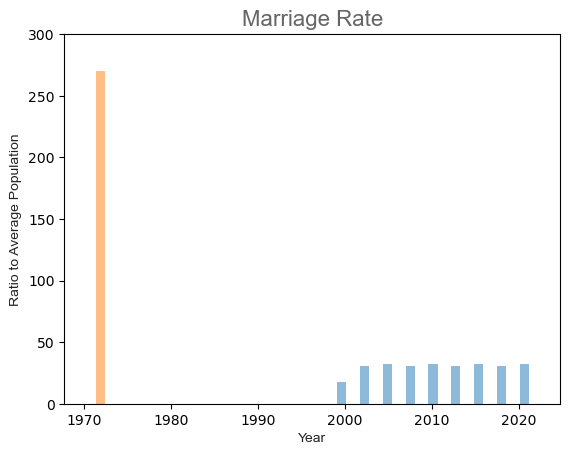

In [179]:
# hist 08 - Marriage Rate

x08 = dt_seoul.Date
y08 = dt_seoul.Marriage_rate

plt.hist([x08, y08], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Marriage Rate', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Ratio to Average Population', fontdict = font2)
plt.ylim(0, 300)
plt.xlim()
plt.show()

In [180]:
# Include the other descriptive characteristics about the variables: 
# Mean (Chapter 2).

In [181]:
# hist 08 - Marriage Rate mean

statistics.mean(dt_seoul.Marriage_rate)

6.446666666666666

In [182]:
# Include the other descriptive characteristics about the variables: 
# Mode (Chapter 2).

In [183]:
# hist 08 - Marriage Rate mode

statistics.mode(dt_seoul.Marriage_rate)

6.7

In [184]:
# Include the other descriptive characteristics about the variables: 
# Spread (Chapter 2).

In [185]:
# hist 08 - Marriage Rate spread

dt_seoul.Marriage_rate.var()

2.4799702602230504

In [186]:
# Include the other descriptive characteristics about the variables: 
# ails (Chapter 2).

In [187]:
# hist 08 - Marriage Rate tail

dt_seoul.Marriage_rate.tail()

Region
Seoul    4.1
Seoul    3.5
Seoul    3.7
Seoul    4.1
Seoul    3.4
Name: Marriage_rate, dtype: float64

# Include a histogram of each of the 5 variables – in your summary and analysis, 
# identify any outliers and explain the reasoning for them being outliers 
# and how you believe they should be handled (Chapter 2).

In [188]:
# comments

## Natural growth per year.
## Relevant figures should be from 2000-2020;
## Datapoints before 2000 seem to be erratic.
## Mean: 	3,642.87
## Mode: 	4,318.0
## Spread: 	4,659,971.10
## Tail: 	Region
## Seoul    -1059.0
## Seoul    -2527.0
## Seoul    -1747.0
## Seoul    -800.0
## Seoul    -494.0

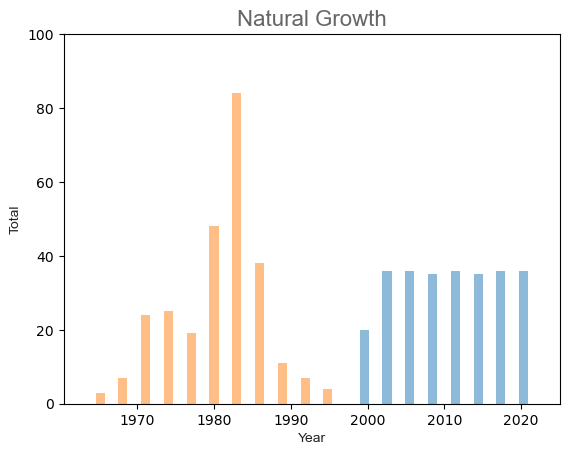

In [189]:
# hist 09 - Natural Growth

x09 = dt_seoul.Date
y09 = dt_seoul.Natural_growth

plt.hist([x09, y09], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Natural Growth', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Total', fontdict = font2)
plt.ylim(0, 100)
plt.xlim()
plt.show()

In [190]:
# Include the other descriptive characteristics about the variables: 
# Mean (Chapter 2).

In [191]:
# hist 09 - Natural Growth mean

statistics.mean(dt_seoul.Natural_growth)

3642.866666666667

In [192]:
# Include the other descriptive characteristics about the variables: 
# Mode (Chapter 2).

In [193]:
# hist 09 - Natural Growth mode

statistics.mode(dt_seoul.Natural_growth)

4318.0

In [194]:
# Include the other descriptive characteristics about the variables: 
# Spread (Chapter 2).

In [195]:
# hist 09 - Natural Growth spread

dt_seoul.Natural_growth.var()

4659971.097397769

In [196]:
# Include the other descriptive characteristics about the variables: 
# Tails (Chapter 2).

In [197]:
# hist 09 - Natural Growth tail

dt_seoul.Natural_growth.tail()

Region
Seoul   -1059.0
Seoul   -2527.0
Seoul   -1747.0
Seoul    -800.0
Seoul    -494.0
Name: Natural_growth, dtype: float64

# Include a histogram of each of the 5 variables – in your summary and analysis, 
# identify any outliers and explain the reasoning for them being outliers 
# and how you believe they should be handled (Chapter 2).

In [198]:
# comments

## Natural growth rate per year.
## Relevant figures should be from 2000-2020;
## Obvious outlier is the datapoint for 1970.
## Mean: 	4.31
## Mode: 	5.50
## Spread: 	6.39
## Tail:     Region
## Seoul    -1.5
## Seoul    -3.2
## Seoul    -2.3
## Seoul    -1.0
## Seoul    -0.6

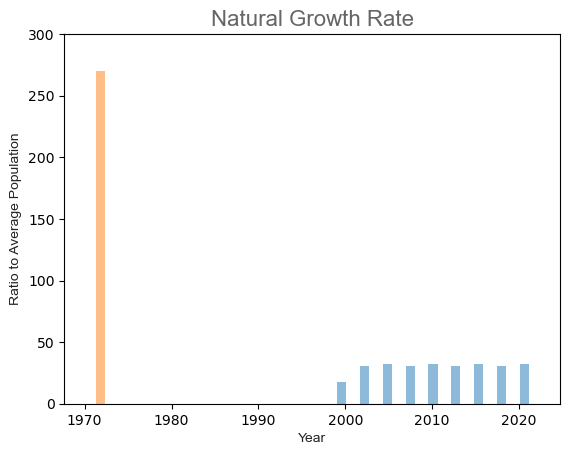

In [199]:
# hist 10 - Natural Growth Rate

x10 = dt_seoul.Date
y10 = dt_seoul.Natural_growth_rate

plt.hist([x10, y10], bins = 20, alpha = 0.5)
font1 = {'family':'arial','color':'#666666','size':16}
font2 = {'family':'arial','color':'#222222','size':10}
plt.title('Natural Growth Rate', loc = 'center', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel('Ratio to Average Population', fontdict = font2)
plt.ylim(0, 300)
plt.xlim()
plt.show()

In [200]:
# Include the other descriptive characteristics about the variables: 
# Mean (Chapter 2).

In [201]:
# hist 10 - Natural Growth Rate mean

statistics.mean(dt_seoul.Natural_growth_rate)

4.310370370370371

In [202]:
# Include the other descriptive characteristics about the variables: 
# Mode (Chapter 2).

In [203]:
# hist 10 - Natural Growth Rate mode

statistics.mode(dt_seoul.Natural_growth_rate)

5.5

In [204]:
# Include the other descriptive characteristics about the variables: 
# Spread (Chapter 2).

In [205]:
# hist 10 - Natural Growth Rate spread

dt_seoul.Natural_growth_rate.var()

6.391341869750788

In [206]:
# Include the other descriptive characteristics about the variables: 
# Tails (Chapter 2).

In [207]:
# hist 10 - Natural Growth Rate tail

dt_seoul.Natural_growth_rate.tail()

Region
Seoul   -1.5
Seoul   -3.2
Seoul   -2.3
Seoul   -1.0
Seoul   -0.6
Name: Natural_growth_rate, dtype: float64

# Using pg. 29 of your text as an example, 
# compare two scenarios in your data using a PMF. 
# Reminder, this isn’t comparing two variables against each other – it is the same variable, 
# but a different scenario. Almost like a filter. 
# The example in the book is first babies compared to all other babies, 
# it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

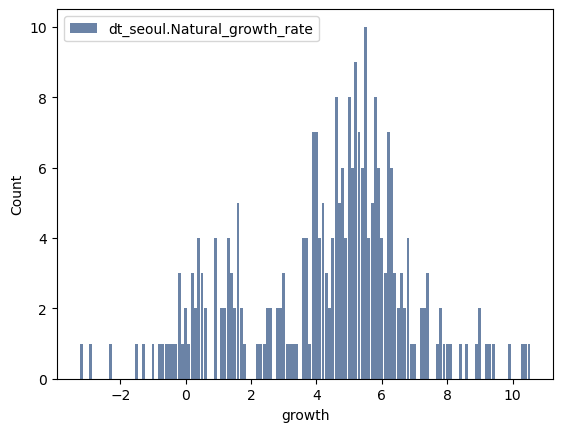

In [208]:
# hist of dt_seoul.Natural_growth_rate

hist = thinkstats2.Hist(dt_seoul.Natural_growth_rate, label="dt_seoul.Natural_growth_rate")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="growth", ylabel="Count")

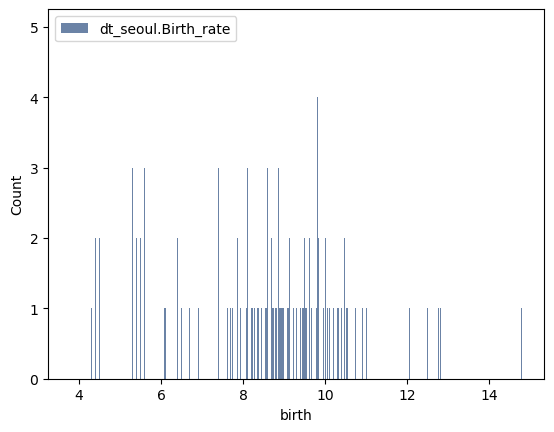

In [209]:
# hist of dt_seoul.Birth_rate

hist = thinkstats2.Hist(dt_seoul.Birth_rate, label="dt_seoul.Birth_rate")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="birth", ylabel="Count")

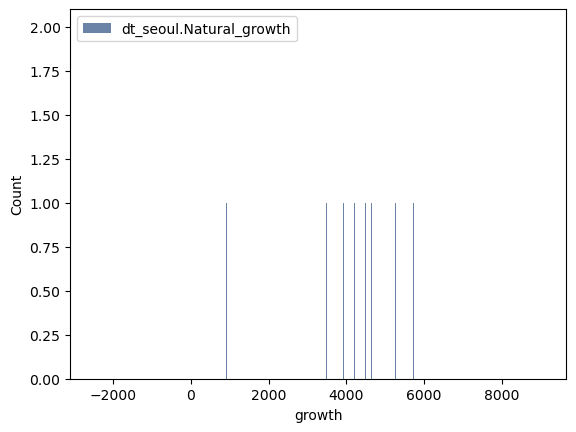

In [210]:
# hist of dt_seoul.Natural_growth

hist = thinkstats2.Hist(dt_seoul.Natural_growth, label="dt_seoul.Natural_growth")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="growth", ylabel="Count")

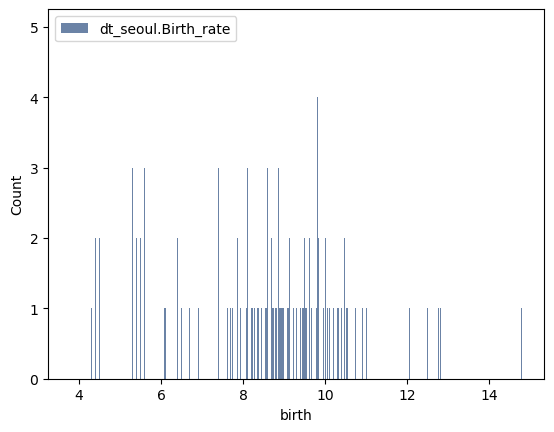

In [211]:
# hist of dt_seoul.Birth_rate

hist = thinkstats2.Hist(dt_seoul.Birth_rate, label="dt_seoul.Birth_rate")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="birth", ylabel="Count")

# Using pg. 29 of your text as an example, 
# compare two scenarios in your data using a PMF. 
# Reminder, this isn’t comparing two variables against each other – it is the same variable, 
# but a different scenario. Almost like a filter. 
# The example in the book is first babies compared to all other babies, 
# it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [212]:
# assign hist

n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf1[x] = freq / n

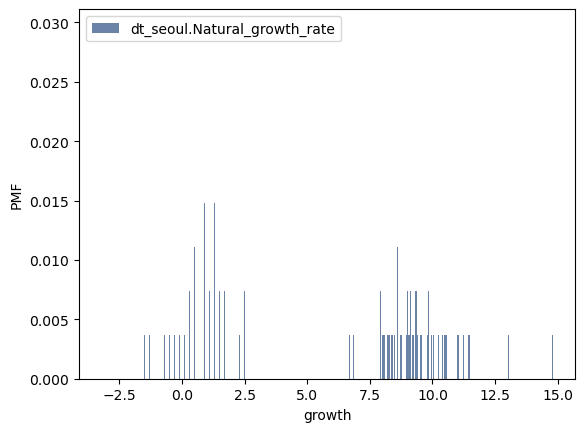

In [213]:
# hist config pmf

thinkplot.Hist(pmf1)
thinkplot.Config(xlabel="growth", ylabel="PMF")

In [214]:
# assign hist

n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf2[x] = freq / n

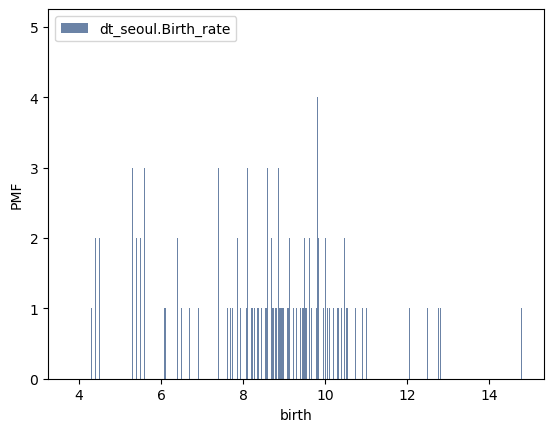

In [215]:
# hist config pmf

thinkplot.Hist(pmf)
thinkplot.Config(xlabel="birth", ylabel="PMF")

In [216]:
# assign pmf

pmf1 = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf1

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [217]:
# assign pmf

pmf1 = thinkstats2.Pmf(dt_seoul.Natural_growth_rate, label="dt_seoul.Natural_growth_rate")

In [218]:
# PMF of natural growth rate

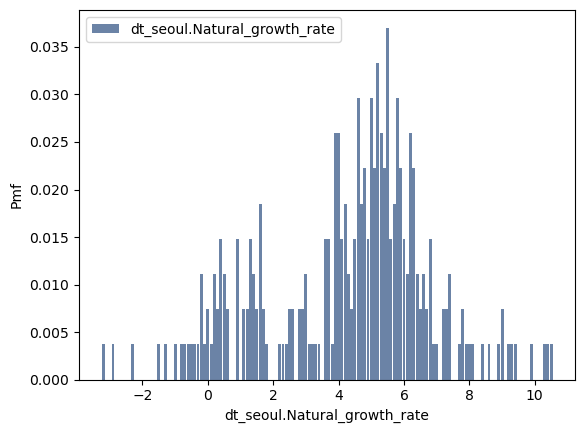

In [219]:
# hist dt_seoul.Natural_growth_rate

thinkplot.Hist(pmf1)
thinkplot.Config(xlabel="dt_seoul.Natural_growth_rate", ylabel="Pmf")

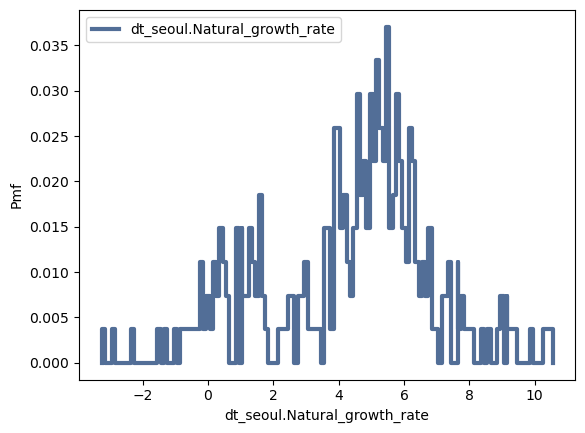

In [220]:
# hist dt_seoul.Natural_growth_rate

thinkplot.Pmf(pmf1)
thinkplot.Config(xlabel="dt_seoul.Natural_growth_rate", ylabel="Pmf")

In [221]:
# assign

Natural_growth_rate, Natural_growth, Marriage_rate = first.MakeFrames()

In [222]:
# assign

Natural_growth_rate = thinkstats2.Pmf(dt_seoul.Natural_growth_rate, label="dt_seoul.Natural_growth_rate")
Natural_growth = thinkstats2.Pmf(dt_seoul.Natural_growth, label="dt_seoul.Natural_growth")

In [223]:
# Natural growth rate / Growth rate

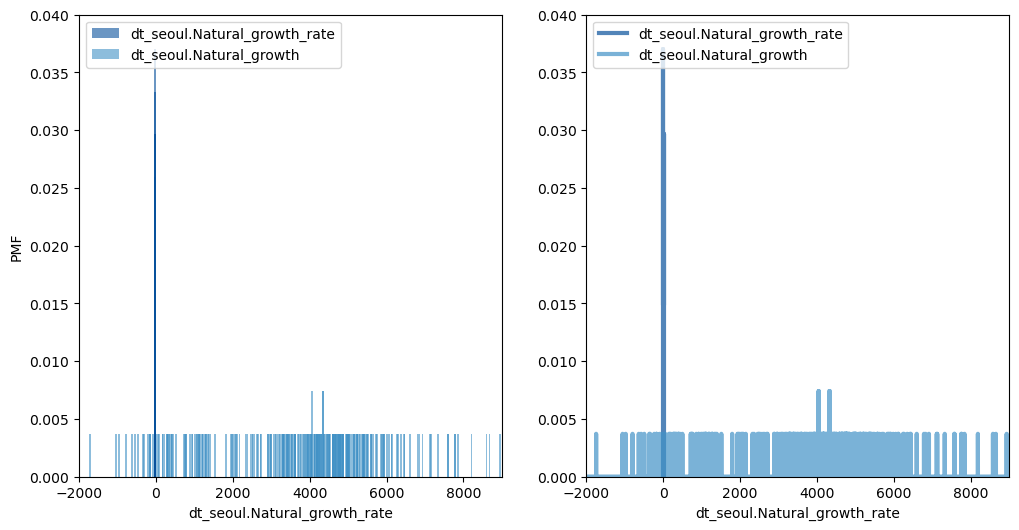

In [224]:
# hist PMF

width = 45.0
axis = [-2000, 9000, 0, 0.04]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(Natural_growth_rate, align="right", width=width)
thinkplot.Hist(Natural_growth, align="left", width=width)
thinkplot.Config(xlabel="dt_seoul.Natural_growth_rate", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([Natural_growth_rate, Natural_growth])
thinkplot.Config(xlabel="dt_seoul.Natural_growth_rate", axis=axis)

In [225]:
# assign pmf

pmf2 = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf2

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [226]:
# assign pmf

pmf2 = thinkstats2.Pmf(dt_seoul.Birth_rate, label="dt_seoul.Birth_rate")

In [227]:
# PMF of birth rate

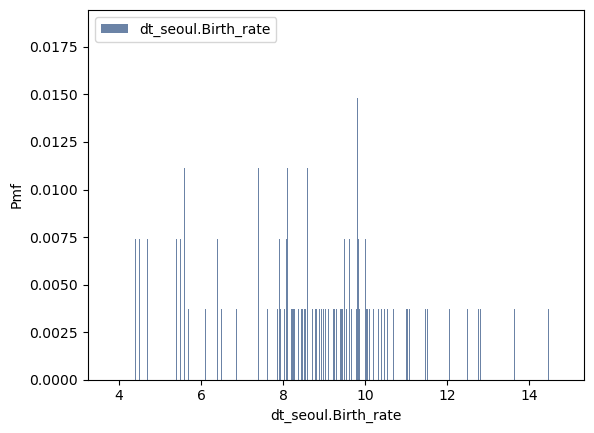

In [228]:
# hist dt_seoul.Birth_rate

thinkplot.Hist(pmf2)
thinkplot.Config(xlabel="dt_seoul.Birth_rate", ylabel="Pmf")

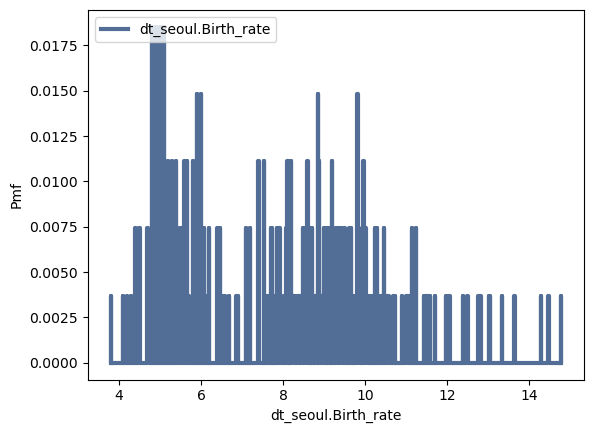

In [229]:
# hist dt_seoul.Birth_rate

thinkplot.Pmf(pmf2)
thinkplot.Config(xlabel="dt_seoul.Birth_rate", ylabel="Pmf")

# Create 1 CDF with one of your variables, 
# using page 41-44 as your guide, what does this tell you about your variable 
# and how does it address the question you are trying to answer (Chapter 4).

In [230]:
# comments

## graph seems to be erratic.
## CDF does not accurately represent PMF for unknown reasons.
## growth rate variable is static

In [231]:
# func EvalCDF

def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In [232]:
# assign t

t = [1, 2, 2, 3, 5]

In [233]:
# assign eval

EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)

(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

In [234]:
# CDF of natural growth rate

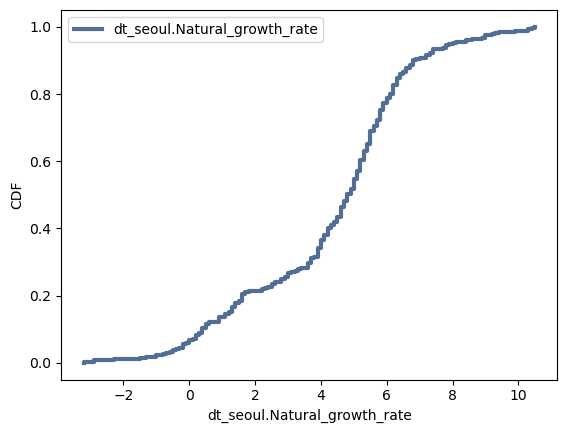

In [235]:
# hist CDF

cdf = thinkstats2.Cdf(dt_seoul.Natural_growth_rate, label='dt_seoul.Natural_growth_rate')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='dt_seoul.Natural_growth_rate', ylabel='CDF', loc='upper left')

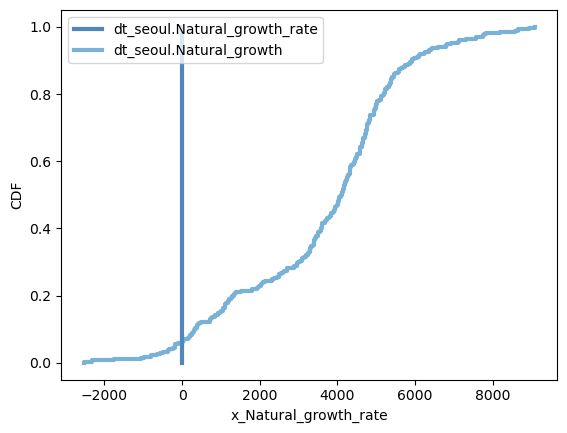

In [236]:
# comparison

x_Natural_growth_rate = thinkstats2.Cdf(dt_seoul.Natural_growth_rate, label='dt_seoul.Natural_growth_rate')
x_Natural_growth = thinkstats2.Cdf(dt_seoul.Natural_growth, label='dt_seoul.Natural_growth')

thinkplot.PrePlot(2)
thinkplot.Cdfs([x_Natural_growth_rate, x_Natural_growth])
thinkplot.Config(xlabel='x_Natural_growth_rate', ylabel='CDF')

In [237]:
# CDF of birth rate

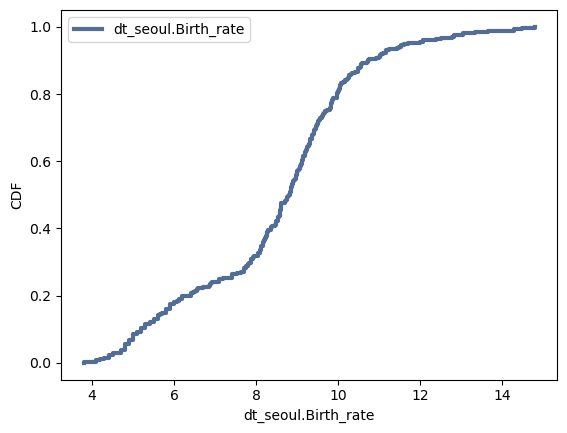

In [238]:
# hist CDF

cdf = thinkstats2.Cdf(dt_seoul.Birth_rate, label='dt_seoul.Birth_rate')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='dt_seoul.Birth_rate', ylabel='CDF', loc='upper left')

In [239]:
# random

import random

def expovariate(lam):
    p = random.random()
    x = -np.log(1 - p) / lam
    return x

In [240]:
# analytical distributions

import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label="actual")

n = len(diffs)
lam = 44.0 / 24 / 60
sample = [random.expovariate(lam) for _ in range(n)]

1 / lam, np.mean(sample)

(32.72727272727273, 33.933857886065574)

# Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [241]:
# Distribution of random and actual

In [242]:
# comments

## actual for model growth rates

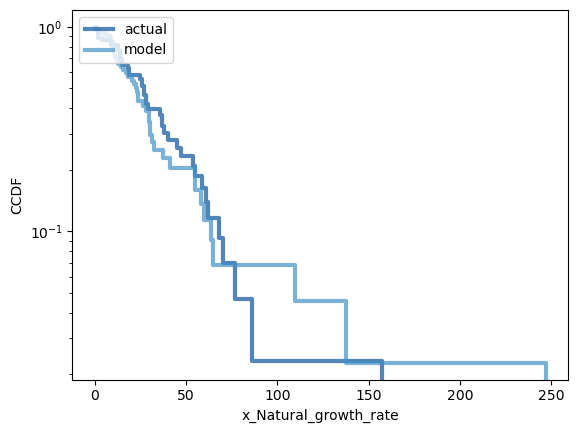

In [243]:
# plot of distribution of random and actual distribution

model = thinkstats2.Cdf(sample, label='model')
    
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf, model], complement=True)
thinkplot.Config(xlabel='x_Natural_growth_rate',
                ylabel='CCDF',
                yscale='log')

# Create two scatter plots comparing two variables and provide your analysis on correlation and causation. 
# Remember, covariance, Pearson’s correlation, 
# and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [244]:
# comments

## Corr:	0.53
## SPC:	    0.51

In [245]:
# func Cov

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [246]:
# func Corr

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [247]:
# func SpearmanCorr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [248]:
# func SpearmanCorr

def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [249]:
# assign natural growth rate, marriage rate

Natural_growth_rate = dt_seoul.Natural_growth_rate
Marriage_rate = dt_seoul.Marriage_rate
print('Corr', Corr(Natural_growth_rate, Marriage_rate))
print('SpearmanCorr', SpearmanCorr(Natural_growth_rate, Marriage_rate))

Corr 0.5296104115268587
SpearmanCorr 0.5143026792909748


In [250]:
# assign birth rate, birth

Birth_rate = dt_seoul.Natural_growth_rate
Birth = dt_seoul.Birth_rate
print('Corr', Corr(Natural_growth_rate, Birth_rate))
print('SpearmanCorr', SpearmanCorr(Natural_growth_rate, Birth_rate))

Corr 1.0
SpearmanCorr 1.0


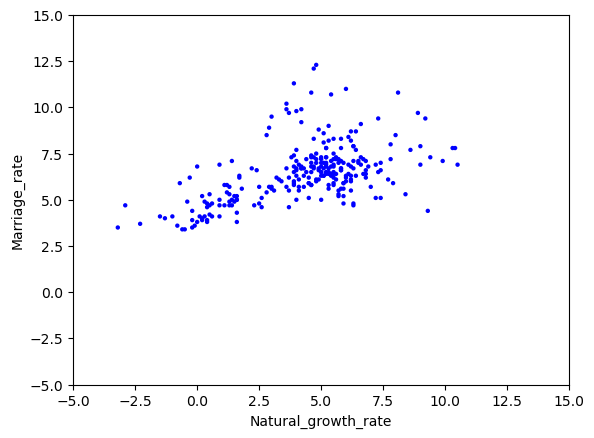

In [251]:
# scatter plot

thinkplot.Scatter(Natural_growth_rate, Marriage_rate, alpha=1, s=10)
thinkplot.Config(xlabel='Natural_growth_rate',
                     ylabel='Marriage_rate',
                     xlim=[-5, 15],
                     ylim=[-5, 15],
                     legend=False)

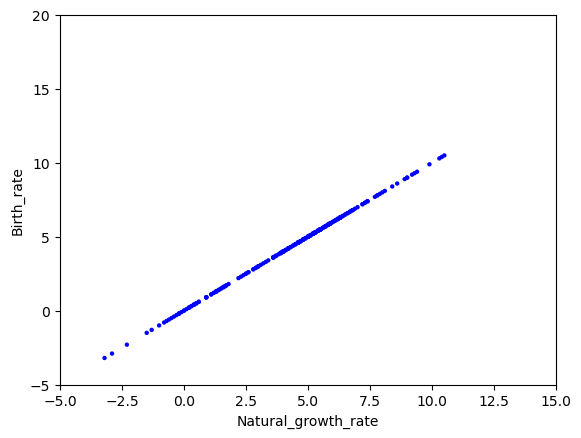

In [252]:
# scatter plot

thinkplot.Scatter(Natural_growth_rate, Birth_rate, alpha=1, s=10)
thinkplot.Config(xlabel='Natural_growth_rate',
                     ylabel='Birth_rate',
                     xlim=[-5, 15],
                     ylim=[-5, 20],
                     legend=False)

In [253]:
# comments

## Corr:	1.00
## SPC:	    1.00

In [254]:
# comments

## Corr          0.5296104115268587
## SpearmanCorr  0.9967248778590662
## indication of very high correlation between variables

# Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [255]:
# assign values

Birth_rate, Natural_growth, Marriage_rate = first.MakeFrames()
data = Natural_growth.values, Marriage_rate.values

In [256]:
# funcs MakeModel, RunModel, TestStatistic, ChiSquared

class BirthMarriageTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        Natural_growth, Marriage_rate = self.data
        self.n = len(Natural_growth)
        self.pool = np.hstack((Natural_growth, Marriage_rate))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(35, 44)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def TestStatistic(self, data):
        Natural_growth, Marriage_rate = data
        stat = self.ChiSquared(Natural_growth) + self.ChiSquared(Marriage_rate)
        return stat

    def ChiSquared(self, lengths):
        hist = thinkstats2.Hist(lengths)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat

In [257]:
#funcs DiffMeansPermute, MakeModel, RunModel

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [258]:
# funcs CorrelationPermute

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [259]:
# func RunTests

def RunTests(Birth_rate, iters=1000):
    n = len(Birth_rate)

    # compare lengths
    data = Natural_growth.prglngth.values, Marriage_rate.prglngth.values
    ht = DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)

    data = (Natural_growth.totalwgt_lb.dropna().values,
            Marriage_rate.totalwgt_lb.dropna().values)
    ht = DiffMeansPermute(data)
    p2 = ht.PValue(iters=iters)

    # test correlation
    Natural_growth2 = Natural_growth.dropna(subset=['agepreg', 'totalwgt_lb'])
    data = Natural_growth2.agepreg.values, Natural_growth2.totalwgt_lb.values
    ht = CorrelationPermute(data)
    p3 = ht.PValue(iters=iters)

    print('%d\t%0.2f\t%0.2f\t%0.2f' % (n, p1, p2, p3))

In [260]:
# return means

n = len(Natural_growth_rate)
for _ in range(7):
    sample = thinkstats2.SampleRows(Natural_growth_rate, n)
    RunTests(sample)
    n //= 2

72900	0.17	0.00	0.00
36450	0.18	0.00	0.00
18090	0.17	0.00	0.00
8910	0.17	0.00	0.00
4320	0.16	0.00	0.00
2160	0.16	0.00	0.00
1080	0.16	0.00	0.00


In [261]:
# comments

## Natural growth rate:
## 72900	 0.17	 0.00	 0.00
## 36450     0.16	 0.00	 0.00
## 18090	 0.15	 0.00	 0.00
## 8910		 0.17	 0.00	 0.00
## 4320		 0.16	 0.00	 0.00
## 2160		 0.18	 0.00	 0.00
## 1080		 0.16	 0.00	 0.00

In [262]:
# return means

n = len(Birth_rate)
for _ in range(7):
    sample = thinkstats2.SampleRows(Birth_rate, n)
    RunTests(sample)
    n //= 2

9148	0.17	0.00	0.00
4574	0.18	0.00	0.00
2287	0.19	0.00	0.00
1143	0.16	0.00	0.00
571	0.16	0.00	0.00
285	0.16	0.00	0.00
142	0.19	0.00	0.00


In [263]:
# comments

## Birth rate:
## 9148	    0.17	0.00	0.00
## 4574	    0.18	0.00	0.00
## 2287	    0.17	0.00	0.00
## 1143	    0.14	0.00	0.00
## 571	    0.17	0.00	0.00
## 285	    0.16	0.00	0.00
## 142	    0.18	0.00	0.00

In [264]:
# return means

n = len(Marriage_rate)
for _ in range(7):
    sample = thinkstats2.SampleRows(Marriage_rate, n)
    RunTests(sample)
    n //= 2

4735	0.16	0.00	0.00
2367	0.16	0.00	0.00
1183	0.18	0.00	0.00
591	0.18	0.00	0.00
295	0.17	0.00	0.00
147	0.16	0.00	0.00
73	0.17	0.00	0.00


In [265]:
# comments

## Marriage rate:
## 4735	    0.17	0.00	0.00
## 2367	    0.18	0.00	0.00
## 1183	    0.17	0.00	0.00
## 591	    0.17	0.00	0.00
## 295	    0.17	0.00	0.00
## 147	    0.18	0.00	0.00
## 73	    0.16	0.00	0.00

# For this project, conduct a regression analysis on either one dependent and one explanatory variable, 
# or multiple explanatory variables (Chapter 10 & 11).

In [266]:
# comments

## Natural growth rate / Birth rate:

## coefficient of determination: 	0.9808550068470339
## intertercept: 			        5.125689303054168
## coefficients: 			        [0.         0.62670069 0.02599732]

## coefficient of determination: 	0.9808550068470339
## intercept: 				        0.0
## coefficients: 			        [5.1256893  0.62670069 0.02599732]

## predicted response:		        [14.33876204 14.57225102 14.45524656 12.87177839…

In [267]:
# assign variables

x = dt_seoul.Natural_growth_rate.values.reshape((-1, 1))
y = dt_seoul.Birth_rate

In [268]:
# transformer

transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [269]:
# assign new variable, return

x_ = transformer.transform(x)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
x_

array([[ 1.0300e+01,  1.0609e+02],
       [ 1.0500e+01,  1.1025e+02],
       [ 1.0400e+01,  1.0816e+02],
       [ 9.0000e+00,  8.1000e+01],
       [ 8.9000e+00,  7.9210e+01],
       [ 8.0000e+00,  6.4000e+01],
       [ 7.9000e+00,  6.2410e+01],
       [ 8.4000e+00,  7.0560e+01],
       [ 9.3000e+00,  8.6490e+01],
       [ 9.4000e+00,  8.8360e+01],
       [ 9.2000e+00,  8.4640e+01],
       [ 8.1000e+00,  6.5610e+01],
       [ 9.9000e+00,  9.8010e+01],
       [ 9.0000e+00,  8.1000e+01],
       [ 8.6000e+00,  7.3960e+01],
       [ 7.8000e+00,  6.0840e+01],
       [ 7.3000e+00,  5.3290e+01],
       [ 6.3000e+00,  3.9690e+01],
       [ 6.2000e+00,  3.8440e+01],
       [ 7.0000e+00,  4.9000e+01],
       [ 7.4000e+00,  5.4760e+01],
       [ 6.8000e+00,  4.6240e+01],
       [ 6.6000e+00,  4.3560e+01],
       [ 6.0000e+00,  3.6000e+01],
       [ 7.8000e+00,  6.0840e+01],
       [ 7.7000e+00,  5.9290e+01],
       [ 7.4000e+00,  5.4760e+01],
       [ 6.6000e+00,  4.3560e+01],
       [ 6.4000e+00,

In [270]:
# fit new variable to y

model = LinearRegression().fit(x_, y)

In [271]:
# return coefficient of determination

r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9808550068470339


In [272]:
# return intercept

print(f"intertercept: {model.intercept_}")

intertercept: 5.125689303054166


In [273]:
# return coefficients

print(f"coeffients: {model.coef_}")

coeffients: [0.62670069 0.02599732]


In [274]:
# assign new variable

x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
x_

array([[ 1.0000e+00,  1.0300e+01,  1.0609e+02],
       [ 1.0000e+00,  1.0500e+01,  1.1025e+02],
       [ 1.0000e+00,  1.0400e+01,  1.0816e+02],
       [ 1.0000e+00,  9.0000e+00,  8.1000e+01],
       [ 1.0000e+00,  8.9000e+00,  7.9210e+01],
       [ 1.0000e+00,  8.0000e+00,  6.4000e+01],
       [ 1.0000e+00,  7.9000e+00,  6.2410e+01],
       [ 1.0000e+00,  8.4000e+00,  7.0560e+01],
       [ 1.0000e+00,  9.3000e+00,  8.6490e+01],
       [ 1.0000e+00,  9.4000e+00,  8.8360e+01],
       [ 1.0000e+00,  9.2000e+00,  8.4640e+01],
       [ 1.0000e+00,  8.1000e+00,  6.5610e+01],
       [ 1.0000e+00,  9.9000e+00,  9.8010e+01],
       [ 1.0000e+00,  9.0000e+00,  8.1000e+01],
       [ 1.0000e+00,  8.6000e+00,  7.3960e+01],
       [ 1.0000e+00,  7.8000e+00,  6.0840e+01],
       [ 1.0000e+00,  7.3000e+00,  5.3290e+01],
       [ 1.0000e+00,  6.3000e+00,  3.9690e+01],
       [ 1.0000e+00,  6.2000e+00,  3.8440e+01],
       [ 1.0000e+00,  7.0000e+00,  4.9000e+01],
       [ 1.0000e+00,  7.4000e+00,  5.476

In [275]:
# fit new variable

model = LinearRegression(fit_intercept=False).fit(x_, y)

In [276]:
# return coefficient of determination

r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9808550068470339


In [277]:
# return intercept

print(f"intercept: {model.intercept_}")

intercept: 0.0


In [278]:
# return coefficients

print(f"coefficients: {model.coef_}")

coefficients: [5.1256893  0.62670069 0.02599732]


In [279]:
# return predicted response

y_pred = model.predict(x_)
print(f"predicted response:\n{y_pred}")

predicted response:
[14.33876204 14.57225102 14.45524656 12.87177839 12.76257312 11.80312327
 11.69911746 12.22434596 13.20251388 13.31379894 13.09174877 11.90764903
 13.87802342 12.87177839 12.43807699 11.5956316  11.0860015  10.10573726
 10.01057054 10.78646279 11.18688763 10.58937005 10.3943571   9.82179695
 11.5956316  11.49266569 11.18688763 10.3943571  10.20142393  9.54253615
  9.82179695  9.72819007  9.72819007  9.35896201  8.9980531   8.04844918
 10.58937005 11.0860015  10.68765645 10.29763054 10.01057054  9.45048911
  9.26795487  9.17746767 10.10573726 10.29763054  9.91592377  9.26795487
 11.18688763 10.4916036  10.4916036  10.20142393  9.45048911  9.35896201
  9.54253615  9.35896201 10.10573726 10.01057054  9.63510313  8.73283086
  9.82179695  9.63510313  9.63510313  8.90912574  8.64546333  8.55861576
  8.47228813  8.90912574  9.54253615  8.9980531   8.82071833  7.96524122
  9.63510313 10.01057054 10.01057054  9.45048911  9.17746767  9.08750041
  8.55861576  9.08750041  9.542

# comments

In [280]:
# The Question
## The answers I have set out to find for the question 
## ‘What are the main causes of the decline in birth rate of the Republic of Korea 
## has become more complex than I had initially thought. 
## It is obvious now that It would require more extensive data and additional variables. 
## Unfortunately the data used in this project was insufficient.

# EDA
## After having gone through all the required steps for exploratory data analysis, 
## the results are inconclusive and require further data. 
## The datasets were incomplete and cover limited time spans. 
## I would have used a different dataset if I had known earlier, 
## but due to time constraints, I completed this study with the initial set. 
## According to the relevant data, 
## there is a gradual positive or negative correlation with all variables examined. 
## The most obvious of these were the correlations with birth rate and natural growth rate. 
## This supports the evidence of the rapid population decrease that the Republic of Korea 
## is experiencing; this is also likely the main culprit of  this phenomenon. 

# Missed During Analysis
## The available data only spanned several decades from 1970-2020 respectively. 
## Some variables were even shorter time spans from 2000-2020. 
## The variables from 1970 had several outliers and were quite erratic, 
## indicating that there were inaccuracies and missing fields. 
## Ideally, a study of this kind would require data 
## that covers at least 100 years to gain any significant insight. 

# Variables that Would have Helped
## There are definitely several additional variables that would have helped in this study. 
## While the dataset used contained variables that were demographical such as 
## ‘birth rate’, ‘death rate’, ‘marriage rate’, etc, other variables such as annual income, 
## real estate value and prices, cost of living, suicide rate, education level, 
## and happiness (if accurately quantifiable) as constant variables would have been of significance.

# Incorrect Assumptions
## Aside from the missing gaps of data, most results were assumed and consistent with reality. 
## It should be mentioned that CDF seemed inaccurate 
## as it showed an increase in natural growth rate over time.

# Challenges
## The biggest challenge was to come up with a valid result 
## and persuasive argument from incomplete data. 
## The chosen dataset contained relevant variables but were limited in time period. 
## A study of this nature requires constant variables that cover significant time periods.  
## As this was my first time doing EDA, there are many steps that I feel I did not fully understand. 
## I hope that repetition will help me to better understand what each step is, why it’s necessary, 
## and to refine more effective ways of executing them. 
## I had initially planned to use more than one dataset for this project; 
## however, due to time constraints, I wasn’t able to delve so far.

## GIT link: https://github.com/rlawnsdnjs706/DSC530_term.git
